In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [515]:
df=pd.read_csv(r"C:\Users\marwa\Downloads\Egypt_Houses_Price.csv")

In [516]:
df.head(50)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
5,Apartment,1844900,4.0,3.0,222.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
6,Duplex,3900000,5.0,5.0,290.0,No,Highest,Jayd,Unknown Payment,Ready to move,Finished,New Cairo - El Tagamoa
7,Apartment,1650000,2.0,2.0,144.0,No,1,Zayed 2000,Unknown Payment,Ready to move,Finished,Sheikh Zayed
8,Apartment,1560000,3.0,3.0,200.0,Unknown,Ground,Unknown,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
9,Apartment,992800,3.0,2.0,146.0,Unknown,3,Unknown,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa


In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [518]:
df['Area'] = df['Area'].replace('Unknown', np.nan)
df['Bedrooms'] = df['Bedrooms'].replace('Unknown', np.nan)
df['Bathrooms'] = df['Bathrooms'].replace('Unknown', np.nan)
df['Price'] = df['Price'].replace('Unknown', np.nan)
#changing Unkhowing data to NAN 

In [519]:
df.isnull().sum()

Type                0
Price              39
Bedrooms          239
Bathrooms         207
Area              507
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [520]:
#we can delete the Null bc its not too much
df.dropna(inplace=True)

In [521]:
df.duplicated().sum()

np.int64(1550)

In [522]:
df.drop_duplicates(inplace=True)

In [523]:
## Fixing the Dtype for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25143 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            25143 non-null  object
 1   Price           25143 non-null  object
 2   Bedrooms        25143 non-null  object
 3   Bathrooms       25143 non-null  object
 4   Area            25143 non-null  object
 5   Furnished       25143 non-null  object
 6   Level           25143 non-null  object
 7   Compound        25143 non-null  object
 8   Payment_Option  25143 non-null  object
 9   Delivery_Date   25143 non-null  object
 10  Delivery_Term   25143 non-null  object
 11  City            25143 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [524]:
df['Bedrooms'] = df['Bedrooms'].replace('10+',11)
df['Bathrooms'] = df['Bathrooms'].replace('10+',11)

In [525]:
df['Bedrooms'] = df['Bedrooms'].astype(float).astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(float).astype(int)
df['Area'] = df['Area'].astype(float).astype(int)
df['Price'] = df['Price'].astype(int)

In [526]:
print(df['Type'].unique())
print(df['Level'].unique())

['Duplex' 'Apartment' 'Penthouse' 'Studio' 'Chalet' 'Standalone Villa'
 'Twin house' 'Town House' 'Stand Alone Villa' 'Twin House']
['7' '10+' '1' '10' 'Ground' 'Highest' '3' '2' '4' '9' '5' '8' '6'
 'Unknown']


### from searching info we get :
 - (Duplex, Apartment, Studio) type can be in different levels
 - (Twin house, Town House, Stand Alone Villa, Chalet) type only on Ground level
 - (Penthouse) type is on Highest only
### because of the Type of property we will change the level from int to str:
 - Ground = 0
 - 10+ = 11
 - Highest = 12

In [527]:
# we can delete all unknowing level data that have ( Duplex , Apartment , Studio ) property type 
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Duplex')].index)
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Apartment')].index)
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Studio')].index)

In [528]:
df.loc[(df['Level']=='10+'),'Level'] = 11
df.loc[(df['Level']=='Highest'),'Level'] = 12
df.loc[(df['Level']=='Ground'),'Level'] = 0

In [529]:
df.loc[(df['Type']=='Penthouse')|
       (df['Type']=='Standalone Villa')|
       (df['Type']=='Town House')|
       (df['Type']=='Twin house')|(df['Type']=='Stand Alone Villa')|
       (df['Type']=='Chalet')|
       (df['Type']=='Twin House'),'Level'] = 0
df.loc[(df['Type']=='Penthouse'),'Level'] = 12

In [530]:
df['Level'] = df['Level'].astype(float).astype(int)

In [531]:
df['Furnished'].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [532]:
df['Payment_Option'].unique()

array(['Cash', 'Cash or Installment', 'Unknown Payment', 'Installment'],
      dtype=object)

### * Furnished Column
From delivery date we can Guess if the property is Furnished or not

In [533]:
df['Delivery_Date'].unique()

array(['Ready to move', '2024', 'Unknown', '2023', 'soon', '2025',
       'within 6 months', '2022', '2026', '2027'], dtype=object)

In [534]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Date']!='Ready to move')&(df['Delivery_Date']!='Unknown')]
#we can replace the Furnished data here naturally with NO bc the Delicery date us to far away

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
9,Apartment,992800,3,2,146,Unknown,3,Unknown,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
64,Apartment,1396000,3,3,179,Unknown,0,Unknown,Cash or Installment,2024,Semi Finished,6th of October
67,Apartment,1805000,2,2,105,Unknown,0,Kayan,Installment,2024,Semi Finished,Sheikh Zayed
76,Apartment,1526400,3,2,212,Unknown,2,Beit Al Watan,Installment,2023,Semi Finished,New Damietta
83,Apartment,1648000,3,3,160,Unknown,3,Midtown Condo,Cash or Installment,2023,Core & Shell,New Capital City
...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Town House,7100000,5,4,285,Unknown,0,Lake West,Cash or Installment,soon,Semi Finished,Sheikh Zayed
27247,Town House,300000,4,4,220,Unknown,0,Mountain View 2,Cash or Installment,2025,Not Finished,New Cairo - El Tagamoa
27275,Twin House,4500000,3,2,200,Unknown,0,The Crown,Cash or Installment,soon,Semi Finished,Sheikh Zayed
27276,Twin House,4900000,4,3,317,Unknown,0,The Crown,Cash or Installment,soon,Unknown,Sheikh Zayed


In [535]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Date']!='Ready to move')&(df['Delivery_Date']!='Unknown'),'Furnished'] = 'No'

##### From Delivery_Term we can Guess if the property is Furnished or not
###### If the property is not fully finished (e.g. Semi Finished, Core & Shell, Not Finished)
###### then it’s very likely NOT furnished — so we replace 'Unknown' with 'No'

In [536]:
df['Delivery_Term'].unique()

array(['Finished', 'Semi Finished', 'Core & Shell', 'Unknown ',
       'Not Finished'], dtype=object)

In [537]:
# Clean extra spaces in 'Delivery_Term' values# 
df['Delivery_Term'] = df['Delivery_Term'].str.strip()

In [538]:
df['Delivery_Term'].unique()

array(['Finished', 'Semi Finished', 'Core & Shell', 'Unknown',
       'Not Finished'], dtype=object)

In [539]:
df.loc[(df['Furnished']=='Unknown')& (df['Delivery_Term']!='Finished') & (df['Delivery_Term']!='Unknown') ]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
8,Apartment,1560000,3,3,200,Unknown,0,Unknown,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
19,Duplex,1100000,3,2,165,Unknown,0,Unknown,Installment,Unknown,Semi Finished,New Damietta
86,Apartment,1613800,3,3,182,Unknown,1,Unknown,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
95,Apartment,2520000,3,2,145,Unknown,1,The Address East,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
102,Apartment,370000,3,2,130,Unknown,3,Unknown,Cash or Installment,Ready to move,Not Finished,Dar al-Salaam
...,...,...,...,...,...,...,...,...,...,...,...,...
27300,Twin House,1268000,7,7,298,Unknown,0,Palm Hills New Cairo,Unknown Payment,Ready to move,Not Finished,New Cairo - El Tagamoa
27320,Stand Alone Villa,13500000,5,5,530,Unknown,0,Villette,Cash,Ready to move,Core & Shell,New Cairo - El Tagamoa
27327,Stand Alone Villa,3750000,3,2,400,Unknown,0,Unknown,Cash,Unknown,Core & Shell,Hurghada
27341,Town House,4000000,4,4,350,Unknown,0,Unknown,Cash or Installment,Unknown,Semi Finished,New Capital City


In [540]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Term']!='Finished')&(df['Delivery_Term']!='Unknown '),'Furnished'] = 'No'

### - Drop columns that have more than 30% of NANs

In [541]:
furnished = len(df[df['Furnished'] == 'Unknown']) / len(df)
level = len(df[df['Level'] == 'Unknown']) / len(df)
compound = len(df[df['Compound'] == 'Unknown']) / len(df)
Payment_Option = len(df[df['Payment_Option'] == 'Unknown']) / len(df)
Delivery_Date = len(df[df['Delivery_Date'] == 'Unknown']) / len(df)
Delivery_Term = len(df[df['Delivery_Term'] == 'Unknown']) / len(df)
City = len(df[df['City'] == 'Unknown']) / len(df)

In [542]:
print('Furnished: ', furnished)
print('Level: ',level)
print('Compound: ',compound)
print('Payment_Option: ',Payment_Option)
print('Delivery_Date: ',Delivery_Date)
print('Delivery_Term: ',Delivery_Term)
print('City: ',City)

Furnished:  0.12353643966547193
Level:  0.0
Compound:  0.4048984468339307
Payment_Option:  0.0
Delivery_Date:  0.3637594583831143
Delivery_Term:  0.17459179609717243
City:  0.0


In [543]:
df = df.drop(columns=['Compound','Delivery_Date'])

In [544]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Duplex,4000000,3,3,400,No,7,Cash,Finished,Nasr City
1,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar
2,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha
3,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City
4,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa


In [545]:
df['Furnished'] = df['Furnished'].replace('Unknown', np.nan)
df['Delivery_Term'] = df['Delivery_Term'].replace('Unknown ', np.nan)
df.dropna(inplace=True)

In [546]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22008 entries, 0 to 22007
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            22008 non-null  object
 1   Price           22008 non-null  int64 
 2   Bedrooms        22008 non-null  int64 
 3   Bathrooms       22008 non-null  int64 
 4   Area            22008 non-null  int64 
 5   Furnished       22008 non-null  object
 6   Level           22008 non-null  int64 
 7   Payment_Option  22008 non-null  object
 8   Delivery_Term   22008 non-null  object
 9   City            22008 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.7+ MB


In [548]:
df.describe()

,Price,Bedrooms,Bathrooms,Area,Level
count,2.200800e+04,22008.000000,22008.000000,22008.000000,22008.000000
mean,4.545292e+06,3.252772,2.817521,233.821065,1.237186
std,5.645434e+06,1.155569,1.294489,159.667237,2.533206
min,3.000000e+04,1.000000,1.000000,10.000000,0.000000
25%,1.200000e+06,3.000000,2.000000,127.000000,0.000000
50%,2.800000e+06,3.000000,3.000000,180.000000,0.000000
75%,5.990000e+06,4.000000,4.000000,280.000000,2.000000
max,2.050000e+08,11.000000,11.000000,995.000000,12.000000


In [549]:
df.describe(include=['object'])

,Type,Furnished,Payment_Option,Delivery_Term,City
count,22008,22008,22008,22008,22008
unique,10,2,4,5,174
top,Apartment,No,Cash or Installment,Finished,New Cairo - El Tagamoa
freq,7313,19893,8552,10049,5718


In [550]:
df['Type'].value_counts()

Type
Apartment            7313
Chalet               4670
Stand Alone Villa    3583
Town House           2671
Twin House           1588
Duplex                711
Standalone Villa      474
Penthouse             435
Twin house            385
Studio                178
Name: count, dtype: int64

In [551]:
df.loc[(df['Type']=='Standalone Villa'),'Type'] = 'Stand Alone Villa'
df.loc[(df['Type']=='Twin house'),'Type'] = 'Twin House'

In [552]:
df['Furnished'].value_counts()

Furnished
No     19893
Yes     2115
Name: count, dtype: int64

In [553]:
df['Delivery_Term'].value_counts()

Delivery_Term
Finished         10049
Semi Finished     5026
Unknown           4384
Not Finished      1664
Core & Shell       885
Name: count, dtype: int64

In [554]:
df['Payment_Option'].value_counts()

Payment_Option
Cash or Installment    8552
Cash                   7845
Installment            3444
Unknown Payment        2167
Name: count, dtype: int64

#### * City Column
##### Deleting Location_City that have less than 5 rows
###### city with low data don't give enough help to the model it's better to drop it

In [555]:
df['City'].value_counts().sort_values(ascending=True)

City
Qasr al-Nil                  1
Saft El Laban                1
El Max                       1
New Beni Suef                1
Darb al-Ahmar                1
                          ... 
Ain Sukhna                1299
6th of October            1513
Sheikh Zayed              1914
North Coast               4480
New Cairo - El Tagamoa    5718
Name: count, Length: 174, dtype: int64

In [556]:
# # Remove cities that appear 5 times or fewer
# df = df[df['City'].map(df['City'].value_counts()) > 5]

In [557]:
ind = df['City'].value_counts(dropna=False).keys().tolist()
val = df['City'].value_counts(dropna=False).tolist()
value_dict = list(zip(ind, val))

In [558]:

lc_sm = []
y = 'Less'
for val,ind in value_dict:
    if ind <= 5:
        lc_sm.append(val)
    else :
        pass
def lcdlt(x):
    if x in lc_sm:
        return y
    else :
        return x

In [559]:

df['City'] = df['City'].apply(lcdlt)

In [560]:

df=df.drop(df[(df['City']=='Less')].index)

<Axes: xlabel='Price', ylabel='City'>

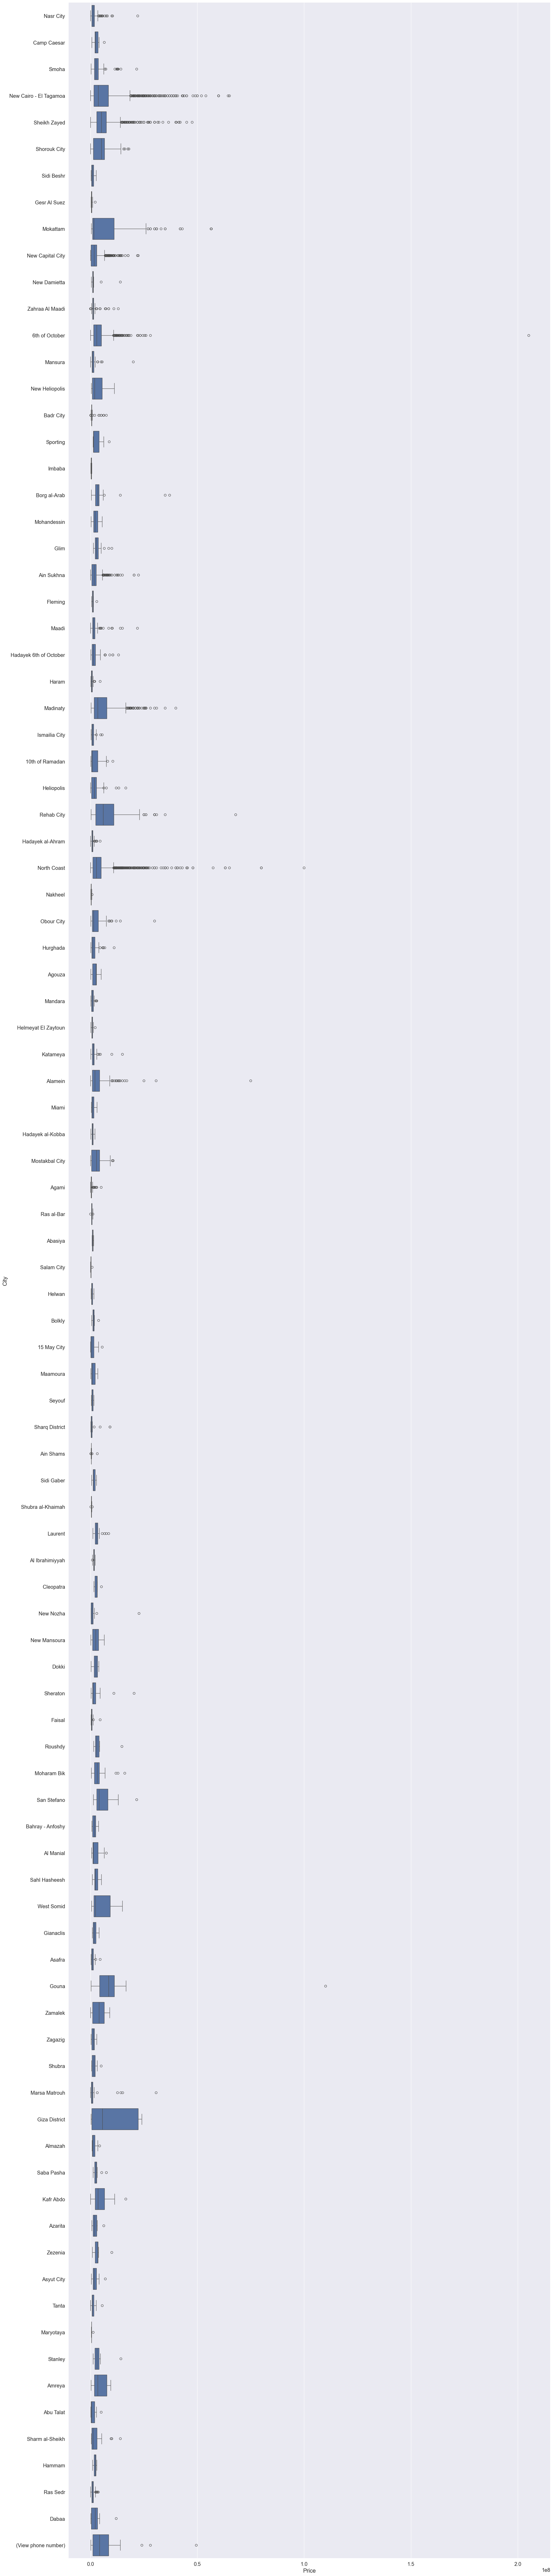

In [561]:
plt.figure(figsize=(24, 128))
sns.boxplot(data=df , x='Price' , y='City')

In [562]:
df['City'].unique()

array(['Nasr City', 'Camp Caesar', 'Smoha', 'New Cairo - El Tagamoa',
       'Sheikh Zayed', 'Shorouk City', 'Sidi Beshr', 'Gesr Al Suez',
       'Mokattam', 'New Capital City', 'New Damietta', 'Zahraa Al Maadi',
       '6th of October', 'Mansura', 'New Heliopolis', 'Badr City',
       'Sporting', 'Imbaba', 'Borg al-Arab', 'Mohandessin', 'Glim',
       'Ain Sukhna', 'Fleming', 'Maadi', 'Hadayek 6th of October',
       'Haram', 'Madinaty', 'Ismailia City', '10th of Ramadan',
       'Heliopolis', 'Rehab City', 'Hadayek al-Ahram', 'North Coast',
       'Nakheel', 'Obour City', 'Hurghada', 'Agouza', 'Mandara',
       'Helmeyat El Zaytoun', 'Katameya', 'Alamein', 'Miami',
       'Hadayek al-Kobba', 'Mostakbal City', 'Agami', 'Ras al-Bar',
       'Abasiya', 'Salam City', 'Helwan', 'Bolkly', '15 May City',
       'Maamoura', 'Seyouf', 'Sharq District', 'Ain Shams', 'Sidi Gaber',
       'Shubra al-Khaimah', 'Laurent', 'Al Ibrahimiyyah', 'Cleopatra',
       'New Nozha', 'New Mansoura', 'Dokki',

In [563]:
lcc=df['City'].value_counts().keys().tolist()

In [564]:
for x in lcc:
    q1=df[(df['City']==x)]['Price'].quantile(0.25)
    q3=df[(df['City']==x)]['Price'].quantile(0.75)
    IQR=q3-q1
    upper_bound= q1 + 1.2 * IQR
    lower_bound = q1 - 1.2 * IQR
    df=df.drop(df[(df['City']==x)&(df['Price']>=upper_bound)].index)
    df=df.drop(df[(df['City']==x)&(df['Price']<=lower_bound)].index)

In [565]:
df=df.drop(df[df['City']=='(View phone number)'].index)

In [566]:
df['Area'].describe()

count    17432.000000
mean       192.444642
std        109.929113
min         10.000000
25%        120.000000
50%        165.000000
75%        231.000000
max        926.000000
Name: Area, dtype: float64

In [567]:
#deleting some raws that doest make sensce like 4 rooms in 100 miters
df=df.drop(df[(df['Area']<=100)&(df['Bedrooms']>=4)].index)
df=df.drop(df[(df['Area']<=30)&(df['Type']!='Studio')].index)

In [568]:
df[(df['Area']>=300)&(df['Price']<=2000000)&(df['Payment_Option']=='Cash')&(df['Delivery_Term']=='Finished')]
df=df.drop(df[(df['Area']>=300)&(df['Price']<=2000000)&(df['Payment_Option']=='Cash')&(df['Delivery_Term']=='Finished')].index)

In [569]:
def Price_range(x) :
    if x <= 1000000 : 
        return 'Low Price'
    elif x <= 3000000 :
        return 'Mid Price'
    else :
        return 'high Price'

In [570]:
df['Price_range'] = df['Price'].apply(Price_range)

In [571]:
df.groupby ('Price_range')['Payment_Option'].value_counts()

Price_range  Payment_Option     
Low Price    Cash or Installment    2716
             Cash                    993
             Unknown Payment         537
             Installment             481
Mid Price    Cash or Installment    2585
             Cash                   2131
             Installment            1200
             Unknown Payment         603
high Price   Cash                   2235
             Cash or Installment    2099
             Installment            1214
             Unknown Payment         596
Name: count, dtype: int64

In [572]:
for col in df.columns :
    print(col ,':', df[col].nunique())
    print(df[col].value_counts().nlargest(7))
    print('\n'+'*'*20+'\n')

Type : 8
Type
Apartment            6815
Chalet               4144
Town House           2224
Stand Alone Villa    1721
Twin House           1285
Duplex                647
Penthouse             380
Name: count, dtype: int64

********************

Price : 3138
Price
3000000    239
2500000    235
3500000    221
2000000    198
1500000    194
2200000    184
4500000    180
Name: count, dtype: int64

********************

Bedrooms : 11
Bedrooms
3    8439
2    4011
4    2990
5     962
1     722
6     186
7      50
Name: count, dtype: int64

********************

Bathrooms : 11
Bathrooms
2    6566
3    5196
1    2675
4    2177
5     622
6     111
7      29
Name: count, dtype: int64

********************

Area : 549
Area
120    473
100    418
125    418
200    355
150    334
170    314
110    311
Name: count, dtype: int64

********************

Furnished : 2
Furnished
No     15993
Yes     1397
Name: count, dtype: int64

********************

Level : 13
Level
0     10861
2      1902
3      1421
1 

C:\Users\marwa\AppData\Local\Temp\ipykernel_20708\1847626101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.values, y=top_20.index , palette='viridis')


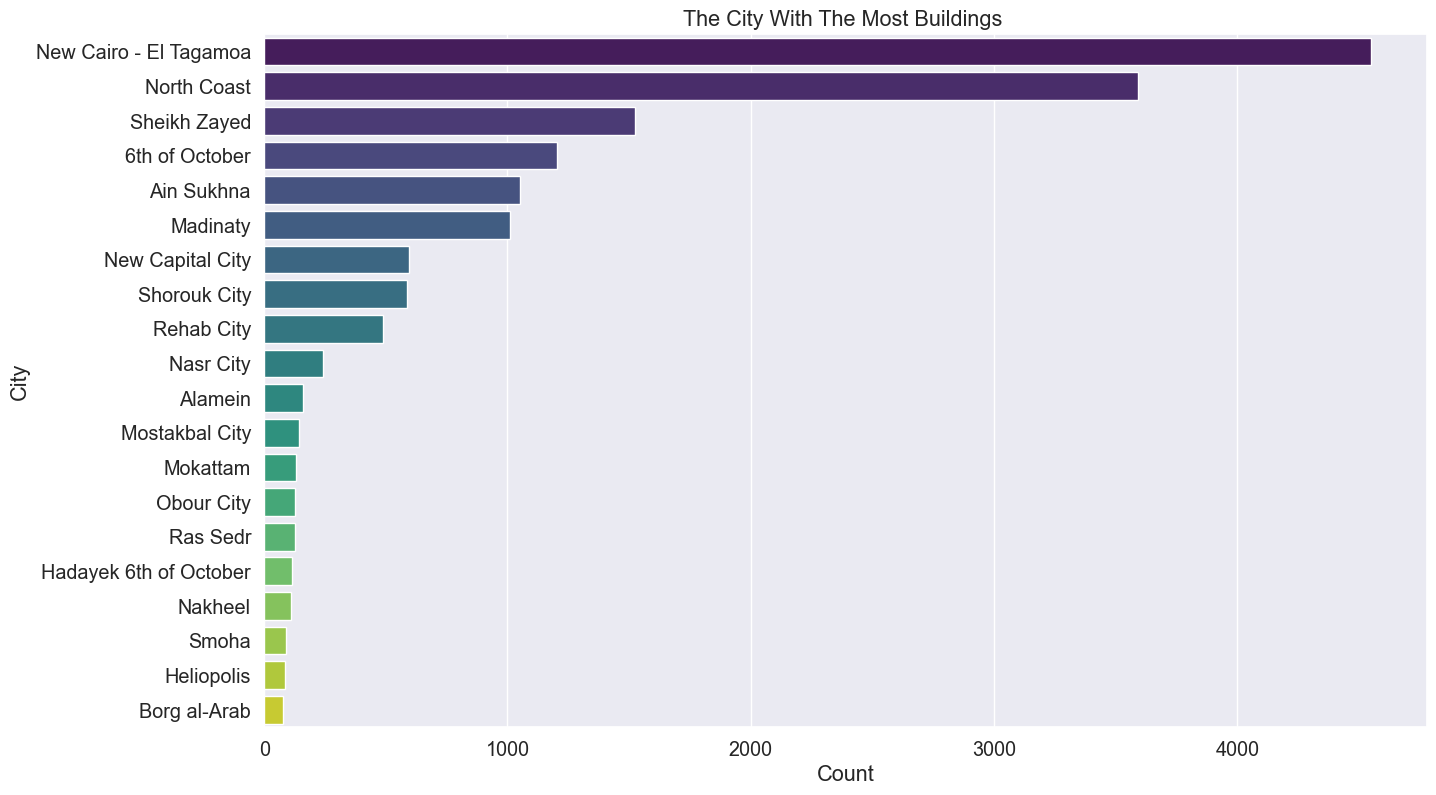

In [573]:
top_20 = df['City'].value_counts().nlargest(20)

sns.barplot(x=top_20.values, y=top_20.index , palette='viridis')
plt.title('The City With The Most Buildings ')
plt.xlabel("Count")
plt.ylabel("City")
plt.show()

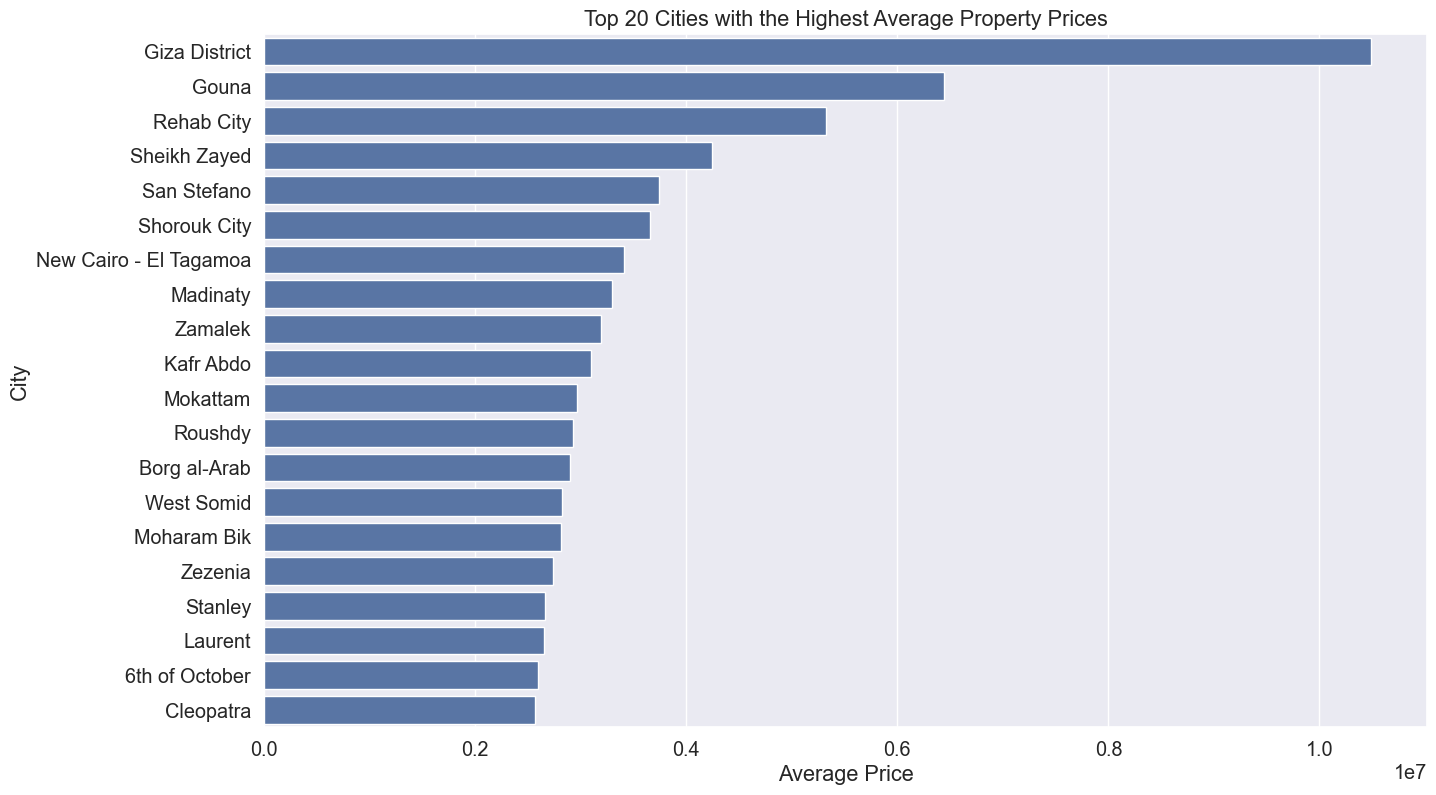

In [574]:
lpm = df.groupby('City')['Price'].mean().nlargest(20)

sns.barplot(y=lpm.index, x=lpm.values)
plt.title('Top 20 Cities with the Highest Average Property Prices')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.show()

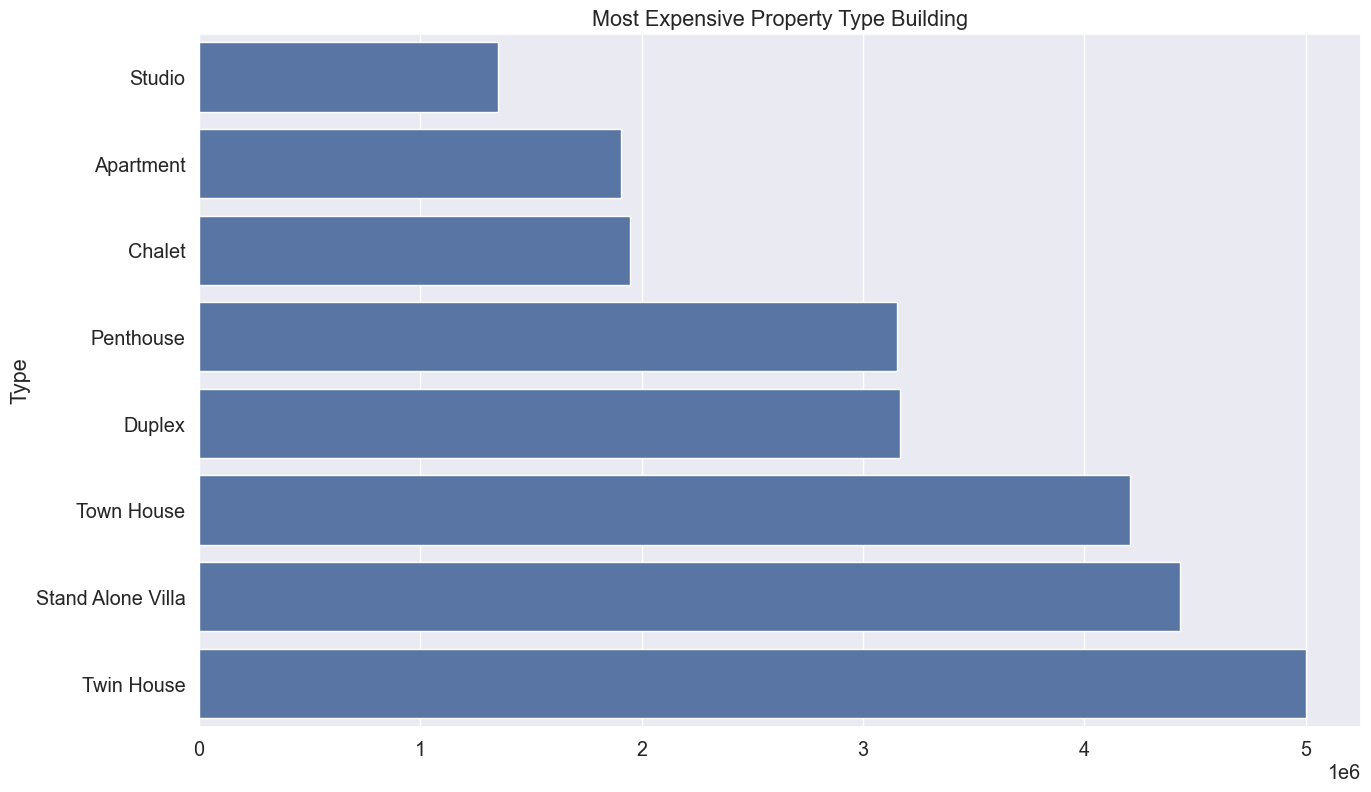

In [575]:
lpp = df.groupby('Type')['Price'].mean().sort_values()
sns.barplot(y=lpp.index,x=lpp.values);
plt.title('Most Expensive Property Type Building');

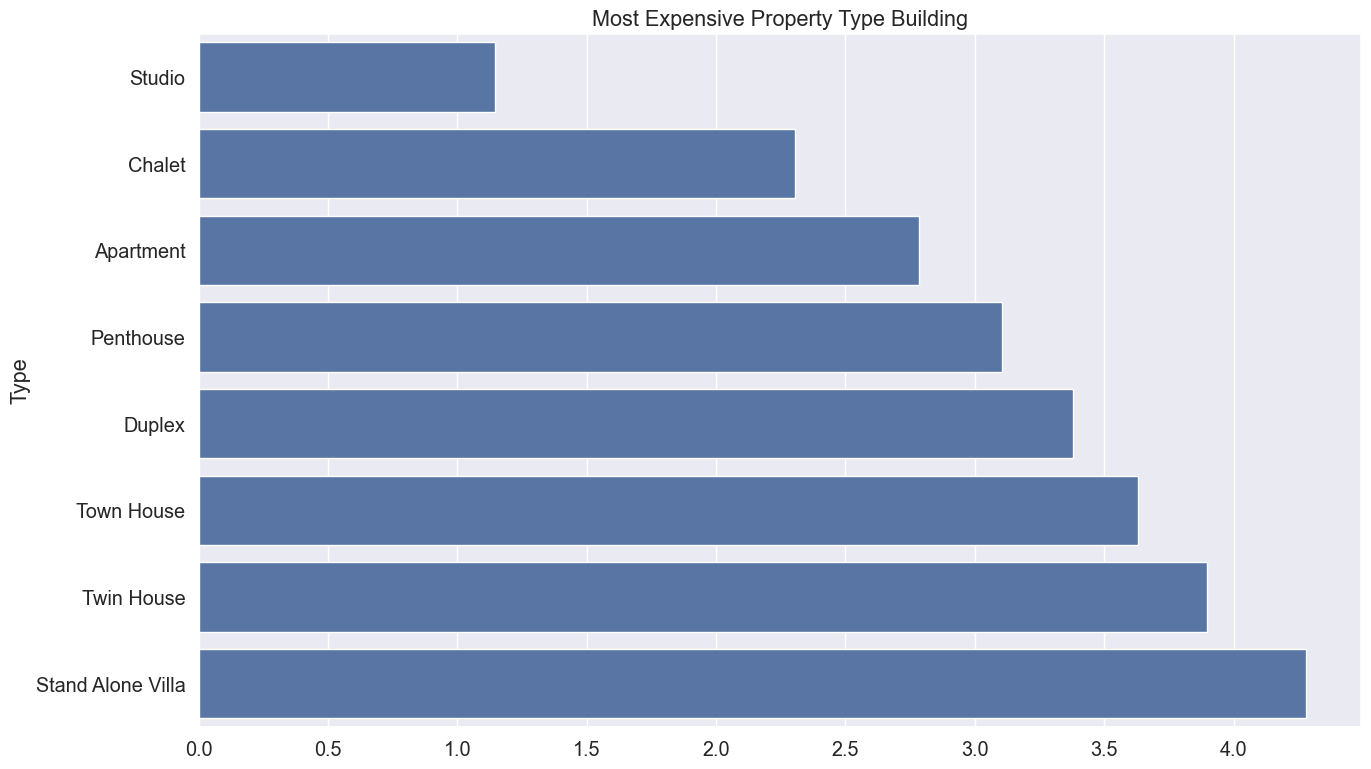

In [576]:
lpp = df.groupby('Type')['Bedrooms'].mean().sort_values()
sns.barplot(y=lpp.index,x=lpp.values);
plt.title('Most Expensive Property Type Building');

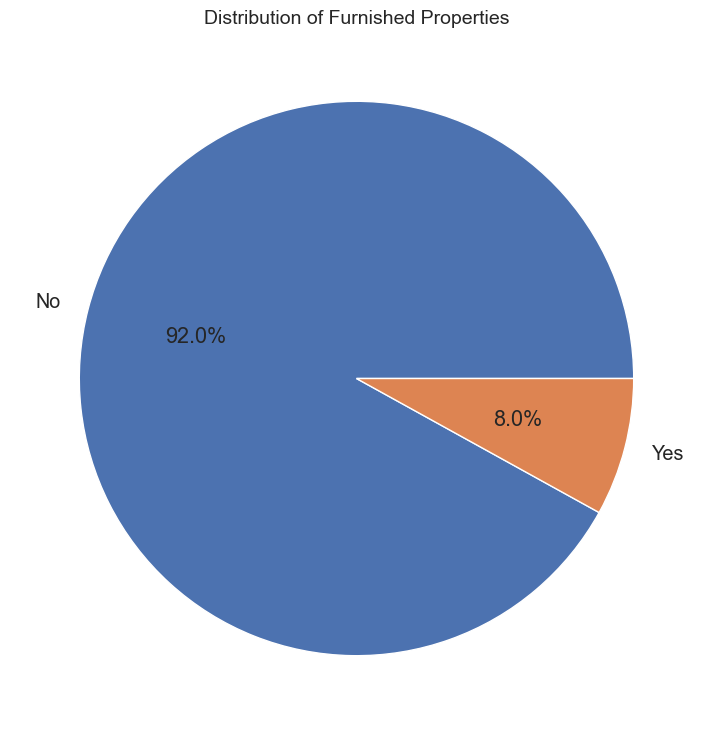

In [577]:
df['Furnished'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of Furnished Properties', fontsize=14)
plt.ylabel('')  
plt.show()

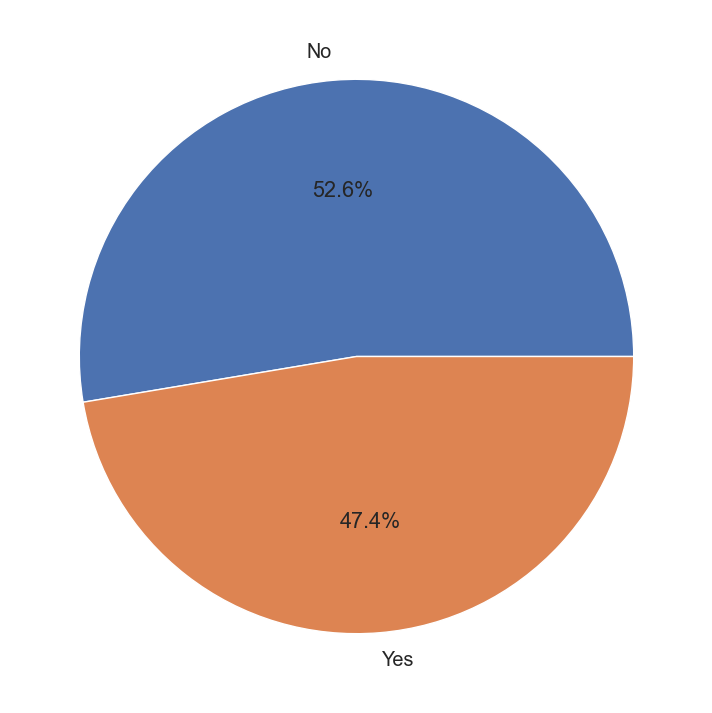

In [578]:
d=df.groupby('Furnished')['Price'].mean()
plt.pie(data = d,autopct='%1.1f%%' ,x=d.values , labels=d.index)
plt.show()

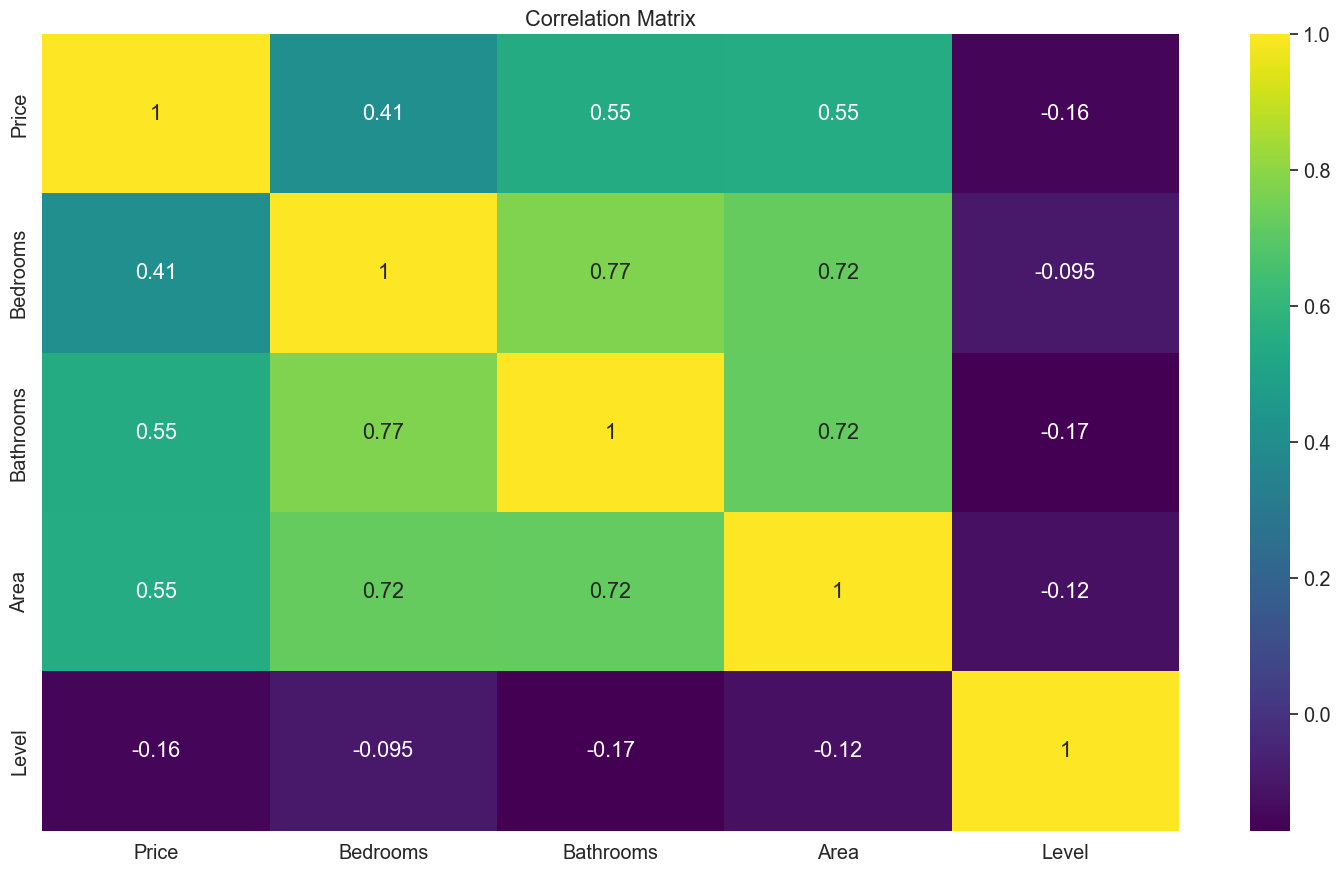

In [579]:
plt.figure(figsize=(15,9))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    data=df.select_dtypes(include='number').corr(),           
    annot=True,        
    cmap='viridis' 
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

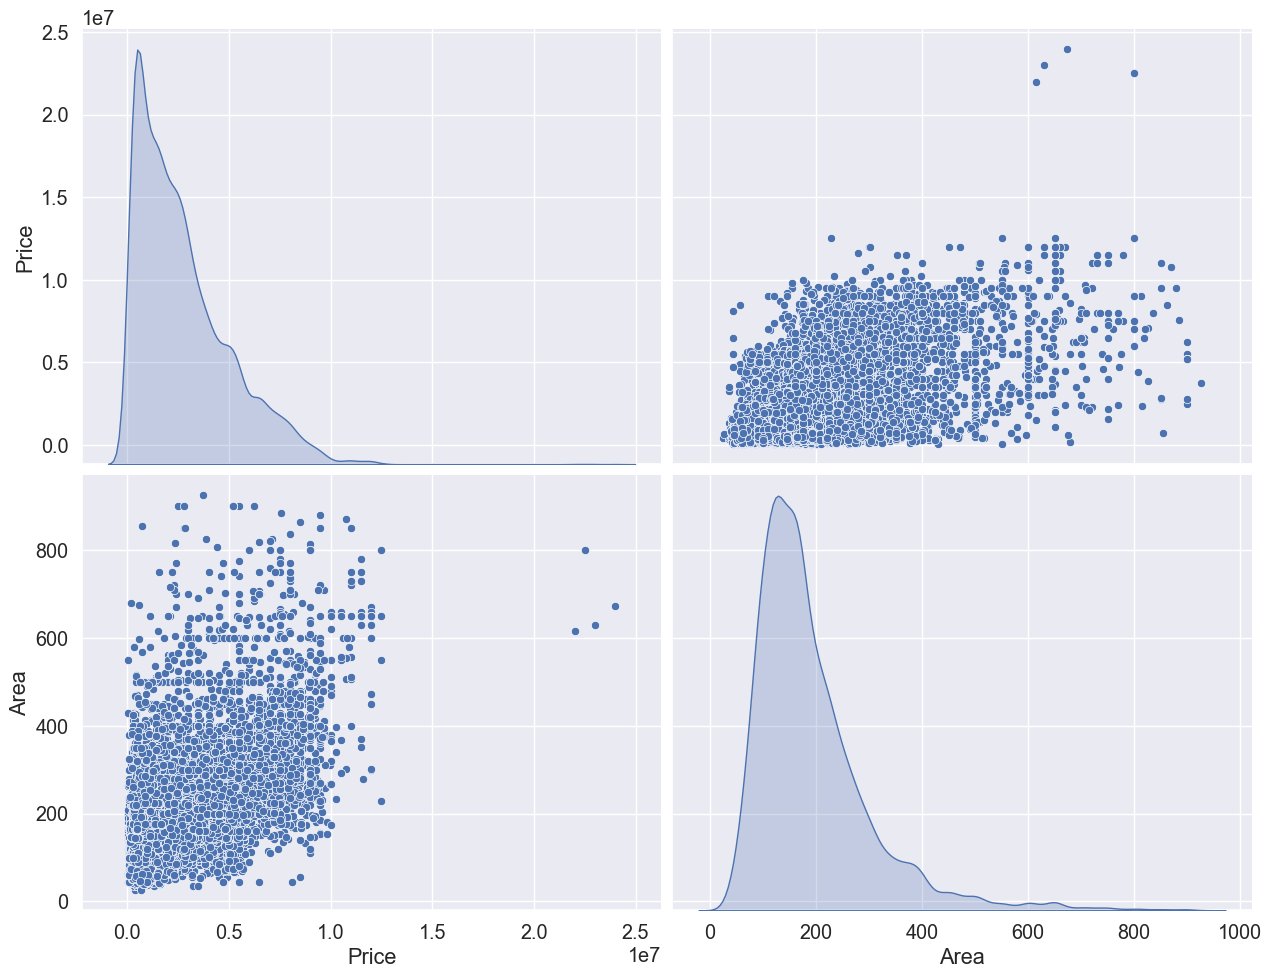

In [580]:
sns.pairplot(df , vars=['Price' , 'Area']  ,diag_kind='kde' , height=5 , aspect=1.3 )

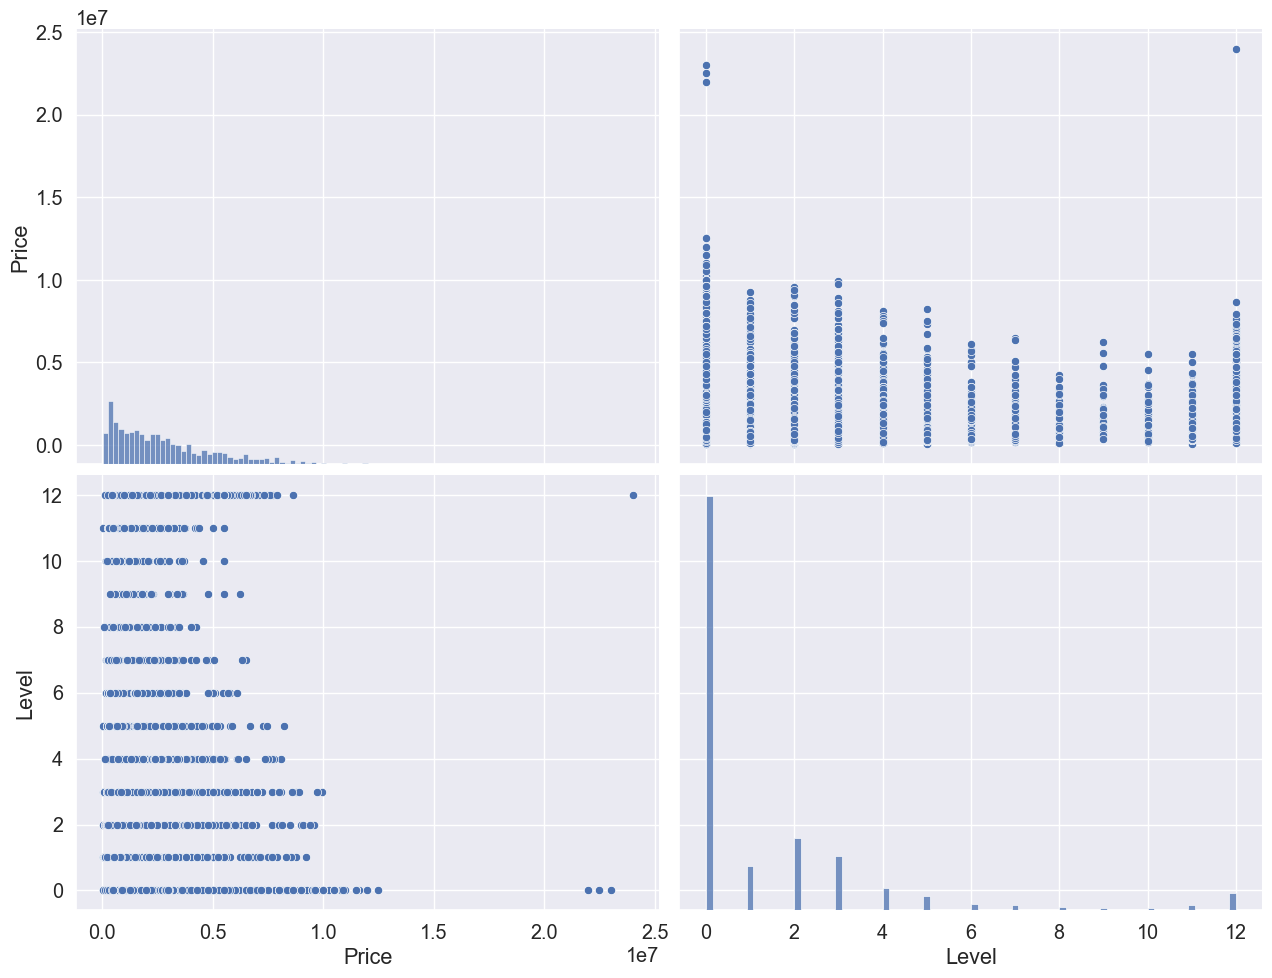

In [581]:
sns.pairplot(df, vars = ['Price', 'Level'], height=5, aspect=1.3);

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'Level'}>, <Axes: >]], dtype=object)

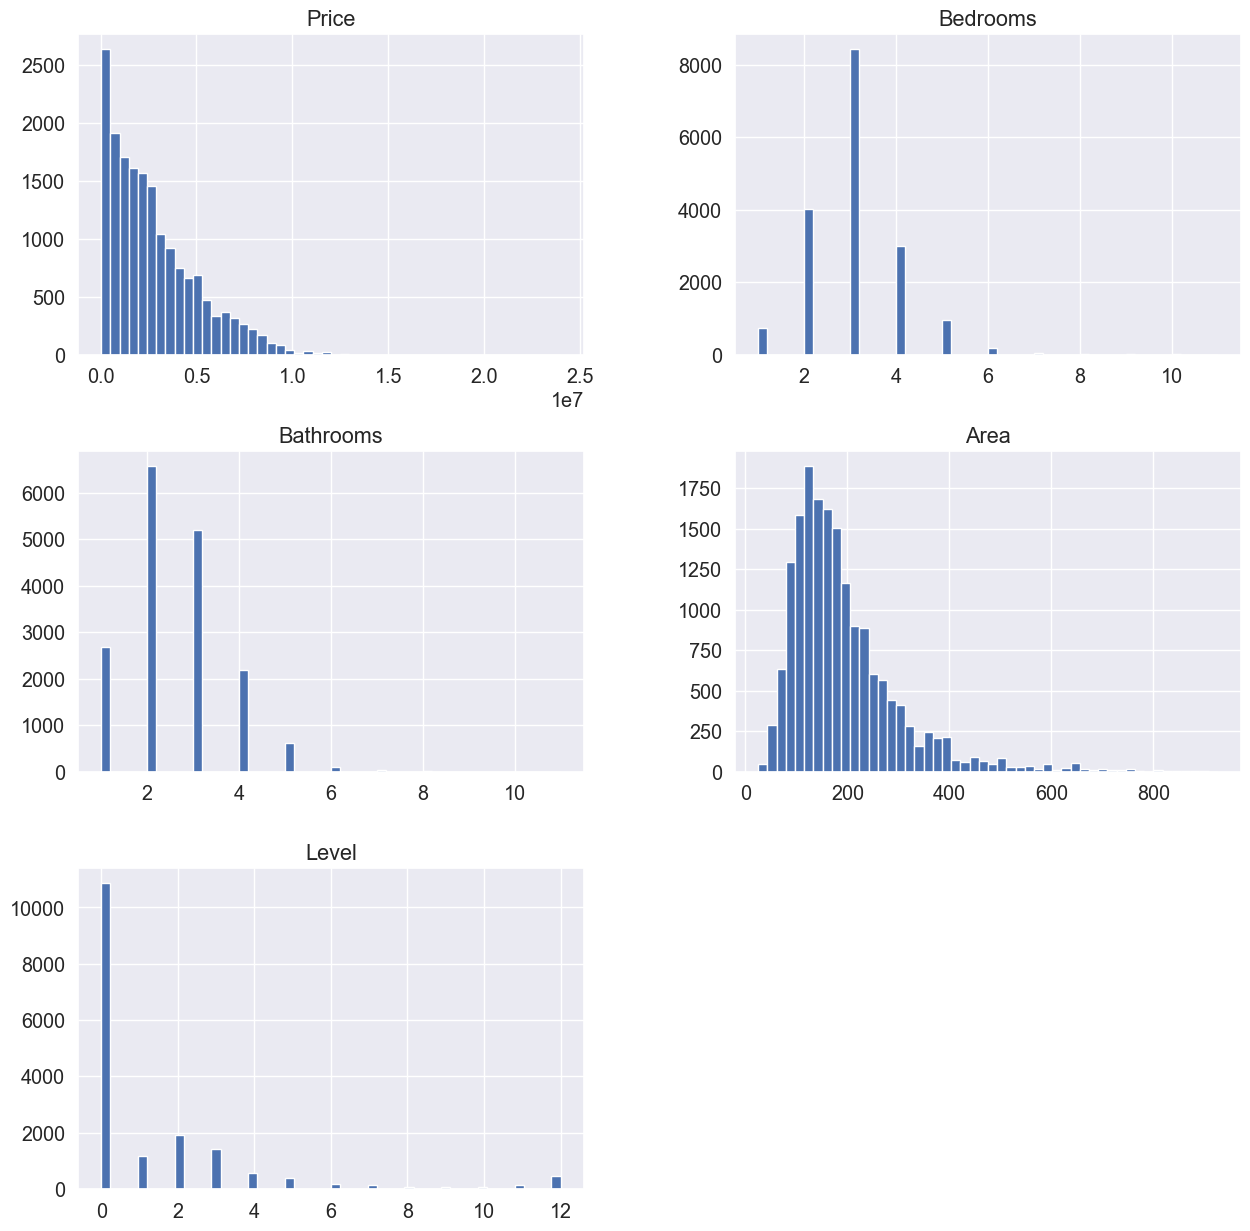

In [582]:
df.hist(bins=50 ,  figsize=(15, 15))

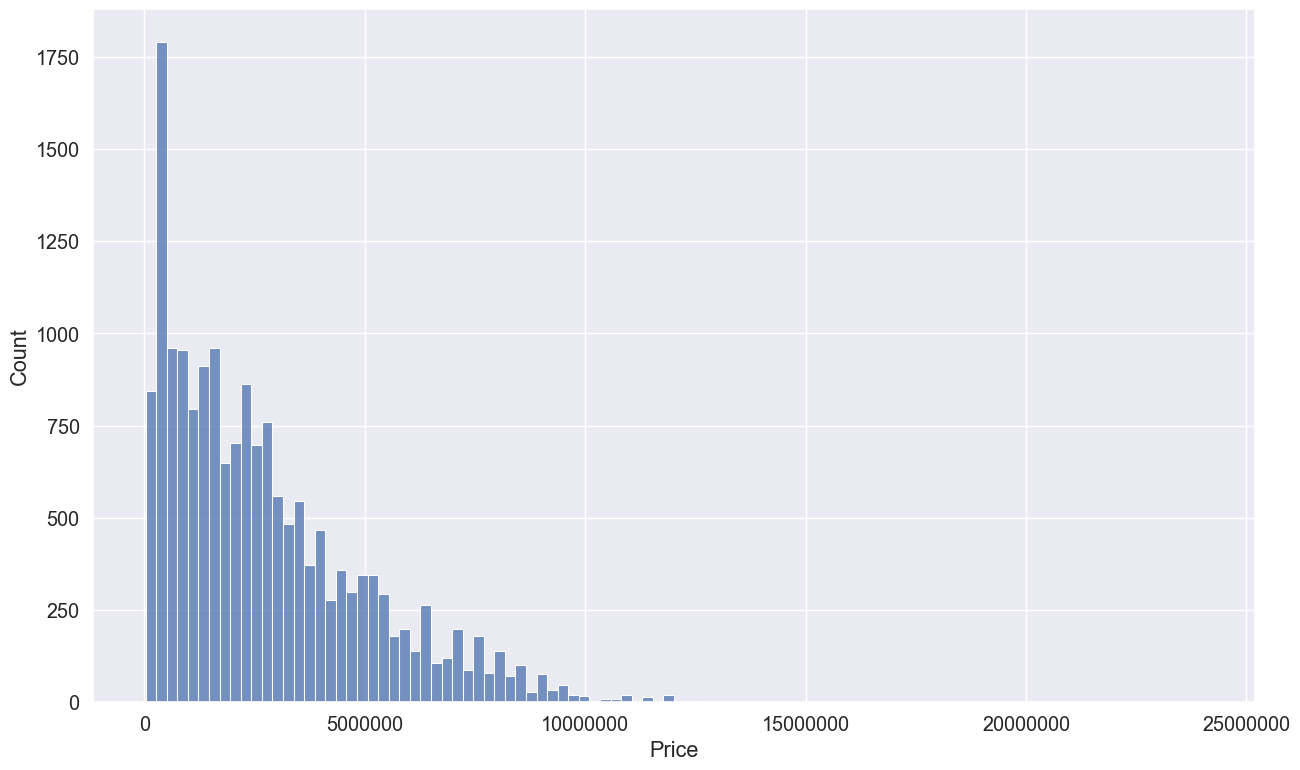

In [583]:
sns.histplot(data=df , x='Price' ,bins=100)
plt.ticklabel_format(style='plain', axis='x')

<Axes: xlabel='Area', ylabel='Density'>

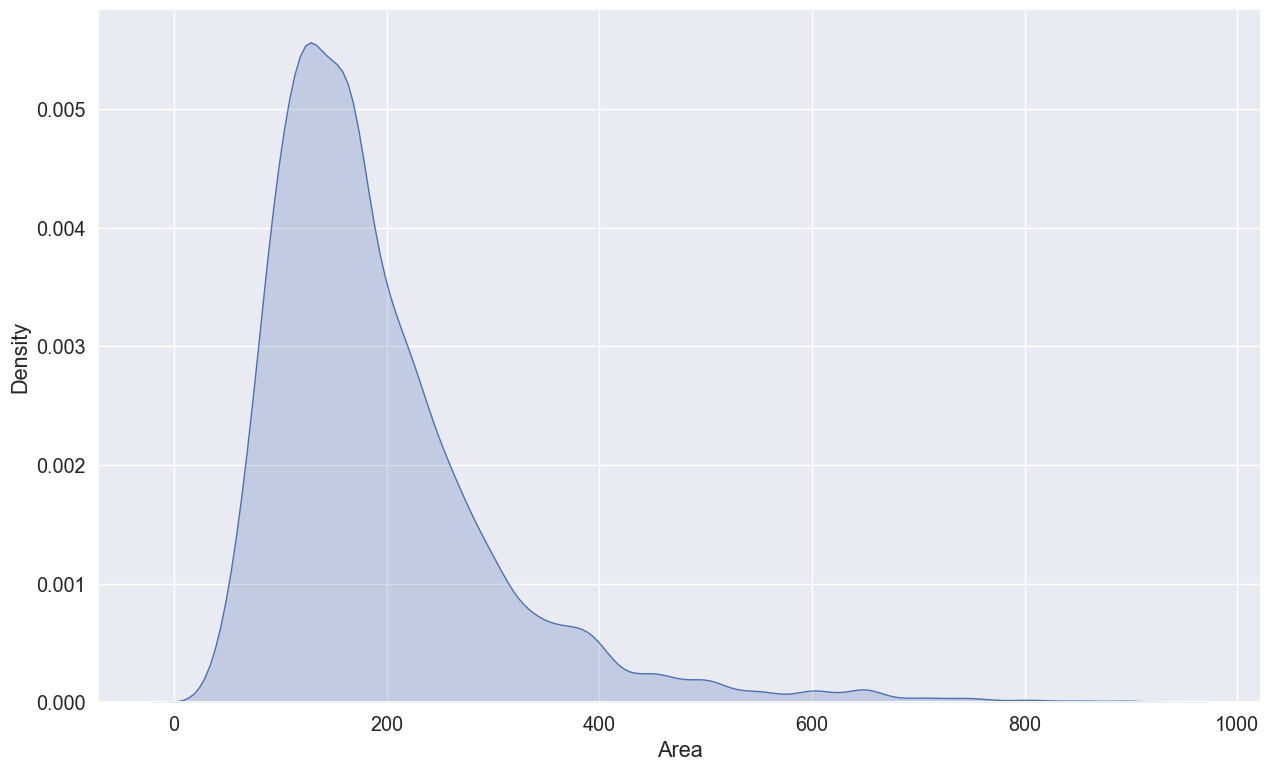

In [584]:
sns.kdeplot(data = df, x ='Area', fill=True )

<Axes: xlabel='Price', ylabel='Count'>

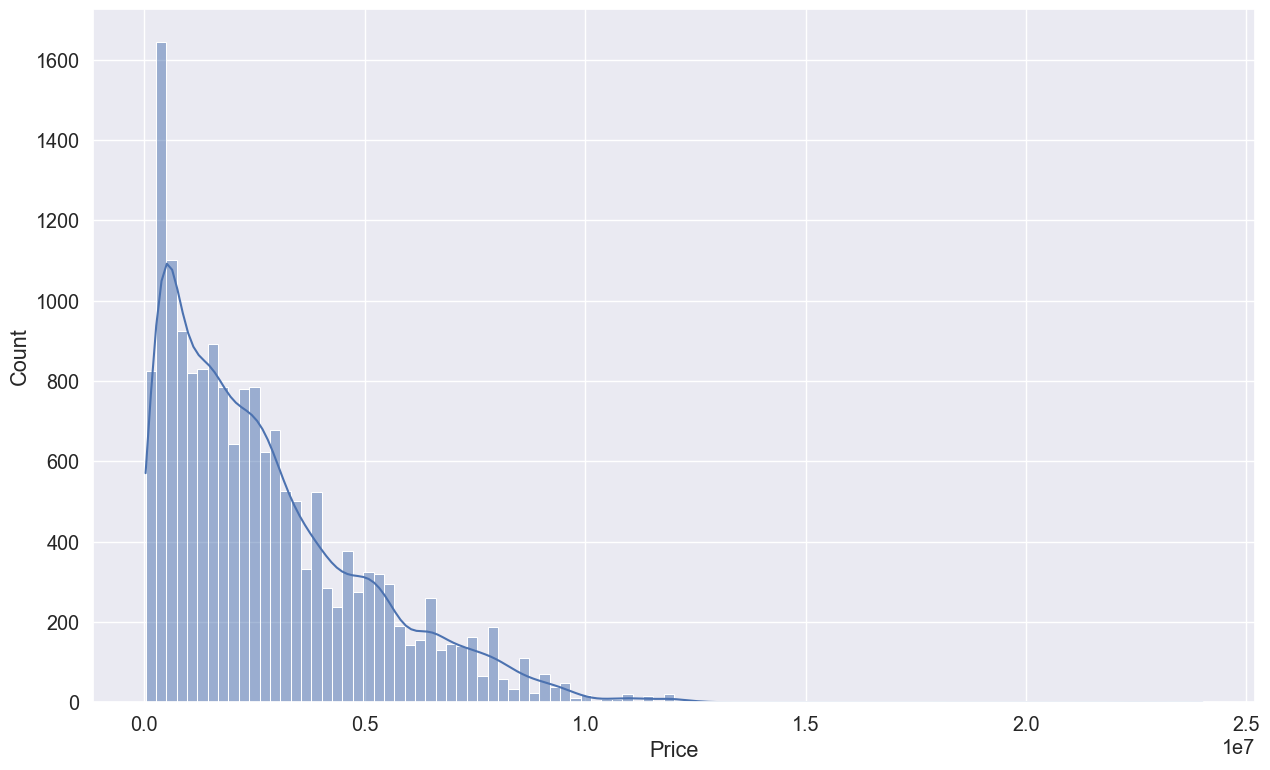

In [585]:
sns.histplot(data = df, x ='Price', kde = True)

In [586]:
#df.to_csv('New_houes_data.csv')

### Building The Models

In [587]:
df = pd.get_dummies(df, columns = ['Type', 'Furnished','City' ,'Payment_Option','Delivery_Term'])
X = df.drop(columns = ['Price','Price_range'])
y = df[['Price']]

In [588]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True ,random_state = 404)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13042, 118), (4348, 118), (13042, 1), (4348, 1))

In [589]:
def performance(model,X_train,y_train,y_pred,y_test):
    '''
    This function for calculating the performance of the model.
    INPUT:
    model: Regression Model. The regression model.
    x_train: numpy.ndarray. The training data in the x.
    y_train: pandas.core.series.Series. The training data in the y.
    y_pred: numpy.ndarray. The predicted data.
    y_test: pandas.core.series.Series. The actual data.
    OUTPUT:
    The model performance by different metrics.
    '''
    print('Training Score:',model.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))

In [590]:
#Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

#The predicted data
lr_pred = lr.predict(X_test)

In [591]:
performance(lr,X_train,y_train,lr_pred,y_test)

Training Score: 0.5071544571629232
Testing Score: 0.5139012859194931
Other Metrics In Testing Data: 
MSE: 2559480778603.747
MAE: 1223754.860115033


In [592]:
#Fitting the model
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

#The predicted data
ridge_pred = ridge.predict(X_test)

#The performance
performance(ridge,X_train,y_train,ridge_pred,y_test)

Training Score: 0.5070317406703044
Testing Score: 0.5135174101892936
Other Metrics In Testing Data: 
MSE: 2561502019401.877
MAE: 1223047.4848635972


In [593]:
#Fitting the model
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

#The predicted data
dt_pred = dt.predict(X_test)

#The performance
performance(dt,X_train,y_train,dt_pred,y_test)

Training Score: 0.9573740685891166
Testing Score: 0.3553089483615324
Other Metrics In Testing Data: 
MSE: 3394525241499.0156
MAE: 1139367.9528506498


In [594]:
#Fitting the model
rf = RandomForestRegressor()
rf.fit(X_train,y_train.values.ravel())

#The predicted data
rf_pred = rf.predict(X_test)

#The performance
performance(rf,X_train,y_train,rf_pred,y_test)

Training Score: 0.9142121350391647
Testing Score: 0.6019359286435269
Other Metrics In Testing Data: 
MSE: 2095947406931.229
MAE: 964524.891224794


In [595]:
#Fitting the model
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

#The predicted data
xgb_pred = xgb.predict(X_test)

#The performance
performance(xgb,X_train,y_train,xgb_pred,y_test)

Training Score: 0.7377505302429199
Testing Score: 0.6439962983131409
Other Metrics In Testing Data: 
MSE: 1874484789248.0
MAE: 973144.875
